In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

### references
https://github.com/JackFongNew/Singapore-HDB-Resale-Price-Prediction

https://github.com/threnjen/king_county_housing?tab=readme-ov-file

https://chatgpt.com/c/681ab061-91ec-800a-9f55-38e64fbf241f

https://github.com/jerrychens/king_county_house_price/blob/master/Final_Jerry.ipynb

https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

https://github.com/aidanandrucyk/KingCountyHouseSalePriceMLAnalysis/blob/master/ML_King_County_Housing_Price_Predictor.ipynb

https://chatgpt.com/c/681af363-3f5c-800a-b621-fa7714205316

In [334]:
df = pd.read_csv(r'C:\Users\Admin\Desktopworkfolder\term 2\Machine learning\CA1\factory_data.csv') #deskstop


# df = pd.read_csv(r'C:\Users\alvin\Deskstopworkfolder\term 2\Machine learning\CA1\factory_data.csv') - laptop

In [335]:
df

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


In [336]:
df.describe

<bound method NDFrame.describe of        Unique ID Product ID Quality  Ambient T (C)  Process T (C)  \
0              1     K12965       M          24.95          35.45   
1              2     Z62710       L          25.05          35.55   
2              3     T20224       L          24.95          35.35   
3              4     Z33024       L          25.05          35.45   
4              5     Z52839       L          25.05          35.55   
...          ...        ...     ...            ...            ...   
19995      19996     T87335       M          25.75          35.35   
19996      19997     Z59525       H          25.85          35.35   
19997      19998     T83921       M          25.95            NaN   
19998      19999     K42424       H          25.95          35.65   
19999      20000     Z10048       M          25.95          35.65   

       Rotation Speed (rpm)  Torque (Nm)  Tool Wear (min)  Machine Status  
0                    1551.0         42.8                0    

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [338]:
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [339]:
# Quality, Process T (C), Rotation Speed (rpm) - missing values
df.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

## Dict

Unique ID: the unique identifier

Product ID: the product ID

Quality: the machine quality, L=Low, M=Medium, H=High

Ambient T: the ambient temperature

Process T: the process temperature

Rotation Speed: the machine rotation speed measured in rpm (rounds per minute)

Torque: the torque of the machine

Tool Wear: the time of tool wear

Machine Status: 0 means normal, 1 means abnormal

In [341]:
# Preprocessing data - part 1 - impute 'Rotation Speed (rpm)', 'Process T (C)'

In [342]:
from sklearn.impute import KNNImputer

df_trans = df.copy(deep=True)
impute_cols = ['Rotation Speed (rpm)', 'Process T (C)']

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_trans[impute_cols] = knn_imputer.fit_transform(df_trans[impute_cols])

In [343]:
df_trans.isnull().sum()

Unique ID                 0
Product ID                0
Quality                 991
Ambient T (C)             0
Process T (C)             0
Rotation Speed (rpm)      0
Torque (Nm)               0
Tool Wear (min)           0
Machine Status            0
dtype: int64

In [344]:
# Preprocessing data - part 2 - impute 'Quality'

In [345]:
df_trans['Quality'].value_counts(dropna = False)


Quality
L      11390
M       5696
H       1923
NaN      991
Name: count, dtype: int64

In [346]:
from sklearn.impute import SimpleImputer

Quality_imputer = SimpleImputer(strategy='most_frequent')

# Example: impute 'Size' column with values like 'small', 'medium', 'large'
df_trans['Quality'] = Quality_imputer.fit_transform(df_trans[['Quality']])[:, 0]

In [347]:
df_trans.isnull().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [348]:
df_trans['Quality'].value_counts(dropna = False)

Quality
L    12381
M     5696
H     1923
Name: count, dtype: int64

In [349]:
# Preprocessing data - part 3 - encode

In [350]:
from sklearn.preprocessing import OrdinalEncoder

In [351]:
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
df_trans['Quality'] = encoder.fit_transform(df_trans[['Quality']])

In [352]:
df_trans

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0
1,2,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0
2,3,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0
3,4,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0
4,5,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0
19996,19997,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0
19997,19998,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0
19998,19999,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0


In [353]:
# Preprocessing data - Renaming/ dropping columns

In [354]:
df_encoded_drop = df_trans.drop(['Unique ID'], axis = 1)

In [355]:
df_encoded_drop

,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0
...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0


In [356]:
df_encoded_drop.rename(columns={
    'Ambient T (C)': 'Ambient T C',
    'Process T (C)': 'Process T C',
    'Rotation Speed (rpm)': 'Rotation Speed rpm',
    'Torque (Nm)': 'Torque Nm',
    'Tool Wear (min)': 'Tool Wear min'
}, inplace=True)


In [357]:
df_encoded_drop['Model type'] = df_encoded_drop['Product ID'].str[0]

In [358]:
df_encoded_drop

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,K
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,Z
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,T
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,Z
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,Z
...,...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0,T
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0,Z
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0,T
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0,K


## Are certain model types (K, Z, T, S) more likely to break down?

<Axes: xlabel='Model type', ylabel='count'>

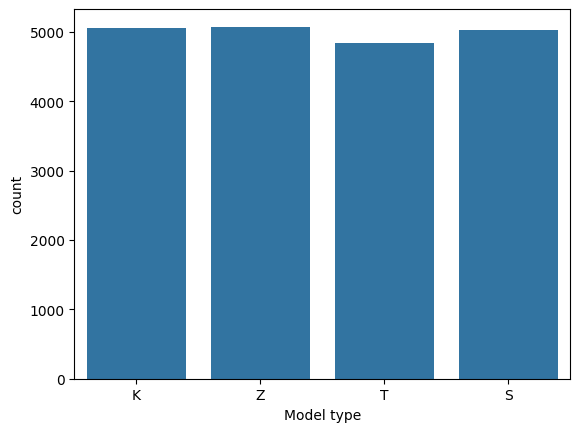

In [360]:
sns.countplot(data=df_encoded_drop, x = "Model type")

In [361]:
a = df_encoded_drop[['Machine Status', 'Model type']]
a

,Machine Status,Model type
0,0,K
1,0,Z
2,0,T
3,0,Z
4,0,Z
...,...,...
19995,0,T
19996,0,Z
19997,0,T
19998,0,K


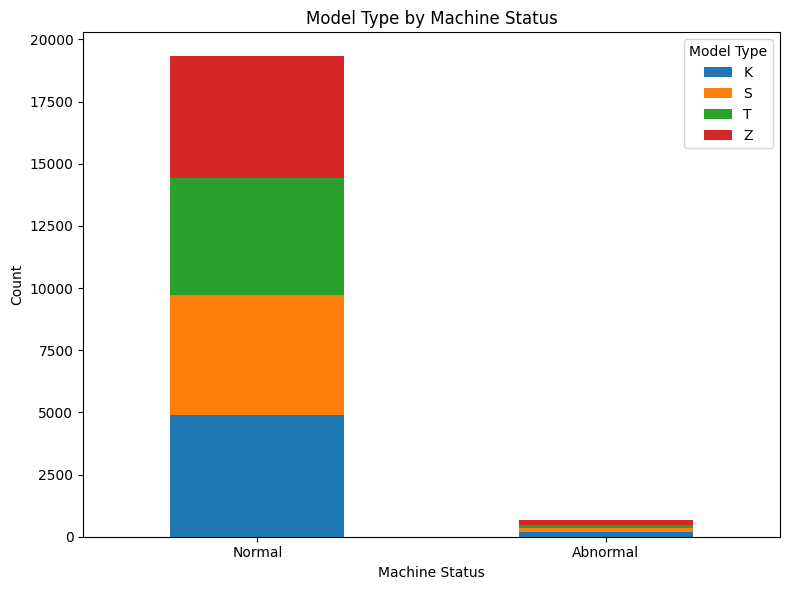

In [362]:
# Group and reshape the data
counts = a.groupby(['Machine Status', 'Model type']).size().unstack(fill_value=0)
new_labels = ['Normal', 'Abnormal']  # Machine Status codes

# Plot the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Model Type by Machine Status')
plt.xlabel('Machine Status')
plt.ylabel('Count')
ax.set_xticklabels(new_labels, rotation=0)  # rotation=0 to keep them horizontal
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

In [363]:
a.value_counts()

Machine Status  Model type
0               Z             4888
                K             4887
                S             4852
                T             4695
1               Z              187
                K              174
                S              172
                T              145
Name: count, dtype: int64

In [364]:
df_clean = pd.get_dummies(df_encoded_drop, columns=['Model type'], dtype=int, drop_first=True)

In [365]:
df_clean

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type_S,Model type_T,Model type_Z
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0,0,1,0
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0,0,0,1
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0,0,1,0
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0,0,0,0


In [366]:
df_clean.rename(columns={
    'Model type_S': 'Model type S',
    'Model type_T': 'Model type T',
    'Model type_Z': 'Model type Z',
}, inplace=True)
		

In [367]:
df_clean_ill = df_clean.drop(['Product ID'], axis = 1)

In [368]:
df_clean_ill

,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type S,Model type T,Model type Z
0,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0
1,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1
2,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0
3,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1
4,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
19995,1.0,25.75,35.350000,1482.500000,29.5,14,0,0,1,0
19996,2.0,25.85,35.350000,1632.000000,31.8,17,0,0,0,1
19997,1.0,25.95,36.904291,1538.795397,33.4,22,0,0,1,0
19998,2.0,25.95,35.650000,1408.000000,48.5,25,0,0,0,0


array([[<Axes: title={'center': 'Quality'}>,
        <Axes: title={'center': 'Ambient T C'}>,
        <Axes: title={'center': 'Process T C'}>],
       [<Axes: title={'center': 'Rotation Speed rpm'}>,
        <Axes: title={'center': 'Torque Nm'}>,
        <Axes: title={'center': 'Tool Wear min'}>],
       [<Axes: title={'center': 'Machine Status'}>,
        <Axes: title={'center': 'Model type S'}>,
        <Axes: title={'center': 'Model type T'}>],
       [<Axes: title={'center': 'Model type Z'}>, <Axes: >, <Axes: >]],
      dtype=object)

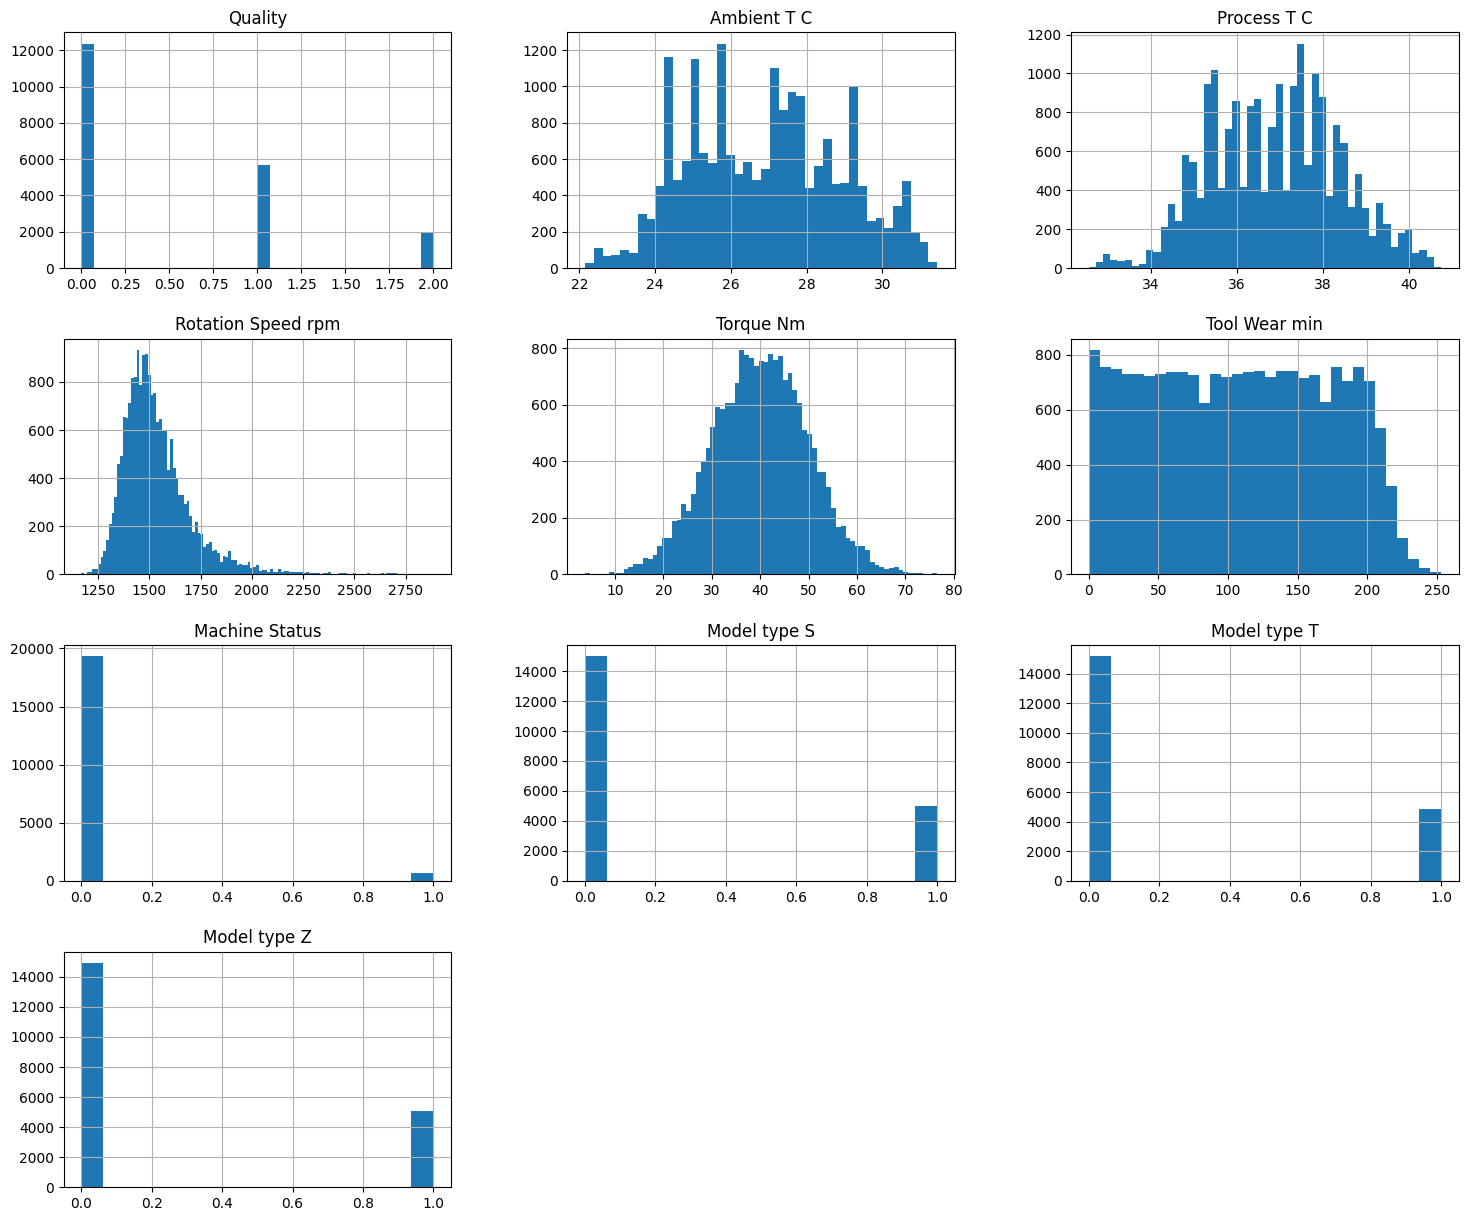

In [369]:
df_clean.hist(figsize=(18,15), bins='auto')

<Axes: xlabel='Machine Status', ylabel='count'>

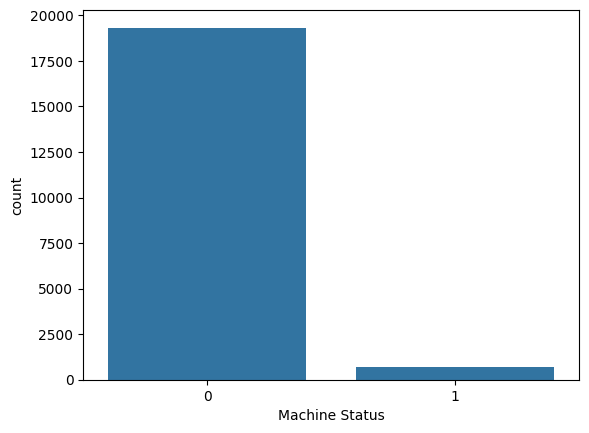

In [370]:
sns.countplot(data=df_clean, x = "Machine Status")
# Given that there is uneven sample size - XGboost will be used.

<Axes: >

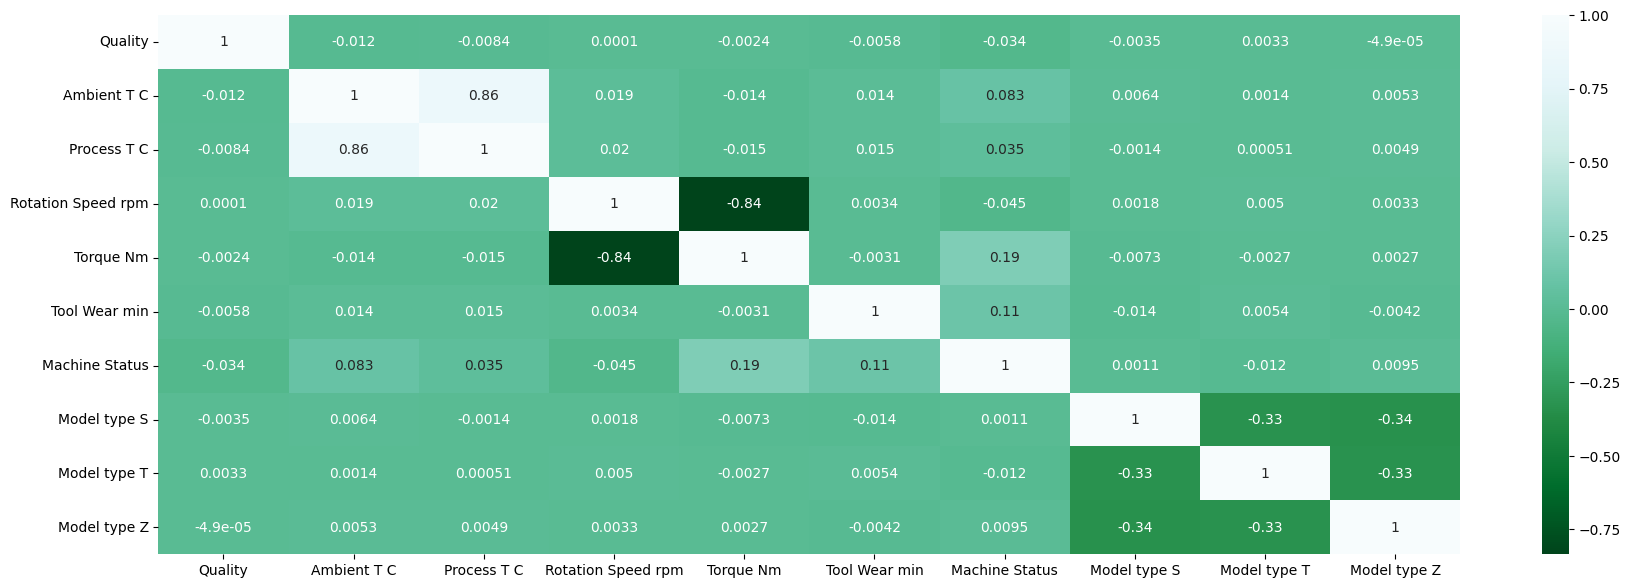

In [371]:
plt.figure(figsize=(21,7))
sns.heatmap(df_clean_ill.corr(), annot=True, cmap='BuGn_r')

In [372]:
print(f"The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86")
print(f"The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84")

The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86
The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84


## Data test split - Model fitting (Linear regression)

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
# Separate features (X) and target variable (y)
X = df_clean.drop('Machine Status', axis=1) # Features
y = df_clean['Machine Status'] #Target

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16000, 10)
X_test shape: (4000, 10)
y_train shape: (16000,)
y_test shape: (4000,)


In [522]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 1. Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')  # Or 'stratified'
dummy.fit(X_train, y_train)

# 2. Predictions from the dummy model
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

# 3. Evaluate dummy model
print("Dummy Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("AUC:", roc_auc_score(y_test, y_proba_dummy))
print("Classification Report:\n", classification_report(y_test, y_pred_dummy, zero_division=0))

labels = {0: 'Normal', 1: 'Abnormal'}
y_test_cate = y_test.value_counts().rename(labels)
print(y_test_cate)

Dummy Classifier Metrics
Accuracy: 0.96575
AUC: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3863
           1       0.00      0.00      0.00       137

    accuracy                           0.97      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.93      0.97      0.95      4000

Machine Status
Normal      3863
Abnormal     137
Name: count, dtype: int64


## Feature creation


In [380]:
def create_features(df):
    df = df.copy()
    df['Power'] = df['Rotation Speed rpm'] * df['Torque Nm']
    #  Statistical Aggregations
    df['TorqueMean'] = df.groupby('Product ID')['Torque Nm'].transform('mean')
    df['ToolWearMax'] = df.groupby('Product ID')['Tool Wear min'].transform('max')
    # Rolling Window Statistics
    df['TorqueRollingMean'] = df.groupby('Product ID')['Torque Nm'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    return df

In [381]:
df_features = create_features(df_clean)

In [382]:
df_features

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type S,Model type T,Model type Z,Power,TorqueMean,ToolWearMax,TorqueRollingMean
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0,66382.800000,42.8,0,42.8
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1,65190.400000,46.3,3,46.3
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0,74001.200000,49.4,5,49.4
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1,56603.500000,39.5,7,39.5
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1,56320.000000,32.0,63,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0,0,1,0,43733.750000,29.5,14,29.5
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0,0,0,1,51897.600000,31.8,17,31.8
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0,0,1,0,51395.766245,33.4,22,33.4
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0,0,0,0,68288.000000,48.5,25,48.5


In [383]:
# Step 1: Create training dataset and test dataset, feature and target variable
train = X_train.copy()
train['Machine Status'] = y_train

test = X_test.copy()
test['Machine Status'] = y_test

# Apply function (feature creation) to both train and test sets
train = create_features(train)
test = create_features(test)

# Selecting features/target - assigning them to respective X_train, y_train etc.
FEATURES = [
    'Power',
    'TorqueMean',
    'ToolWearMax',
    'TorqueRollingMean',
    'Quality',
    'Ambient T C',
    'Process T C',
    'Rotation Speed rpm',
    'Torque Nm',
    'Tool Wear min',
    'Model type S',
    'Model type T',
    'Model type Z'
]
TARGET = 'Machine Status'

# training data set
X_train = train[FEATURES]
y_train = train[TARGET]

# testing data set
X_test = test[FEATURES]
y_test = test[TARGET]

## finding the best parameters

In [385]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score

In [386]:
param_grid = {
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

num_positive = sum(y_train == 1)
num_negative = sum(y_train == 0)

scale_pos_weight = num_negative / num_positive

xgb_clf = XGBClassifier(scale_pos_weight = num_negative / num_positive)

randomsearch = RandomizedSearchCV(xgb_clf, param_grid, cv=5)
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.01, 0.1, 1, 10],
                                        'subsample': [0.8, 1]})

In [387]:
# Print the tuned parameters and score
print("Tuned XGboost Parameters: {}".format(randomsearch.best_params_))
print("Tuned XGboost Regression Best Accuracy Score: {}".format(randomsearch.best_score_))

Tuned XGboost Parameters: {'subsample': 1, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Tuned XGboost Regression Best Accuracy Score: 0.992375


In [388]:
# Get the best model
best_reg = randomsearch.best_estimator_
# Validate the model
y_pred   = best_reg.predict(X_test)

In [389]:
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²:   {r2:.4f}")

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

Test RMSE: 0.0063
Test R²:   0.8110
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3856
           1       0.93      0.89      0.91       144

    accuracy                           0.99      4000
   macro avg       0.97      0.94      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [390]:
y_pred_probs = best_reg.predict_proba(X_test)[:,1]
y_pred_probs[0]

1.0310357e-05

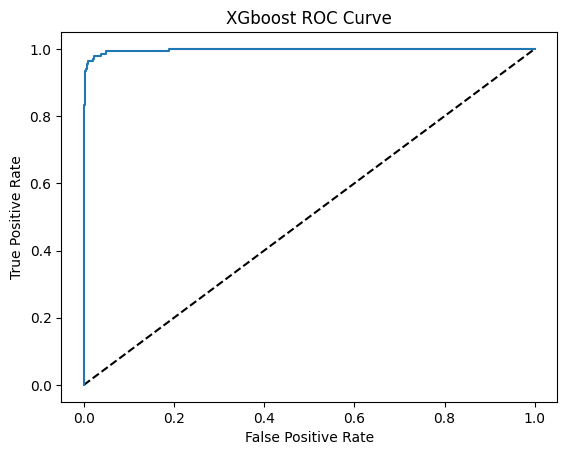

ROC: 0.9970202047877014


In [478]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGboost ROC Curve')
plt.show()

roc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC: {roc}")

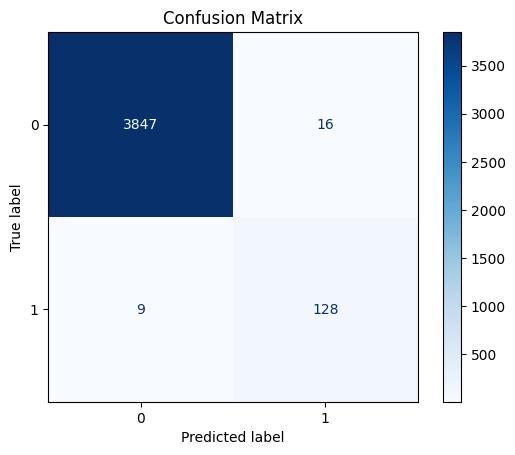

In [489]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

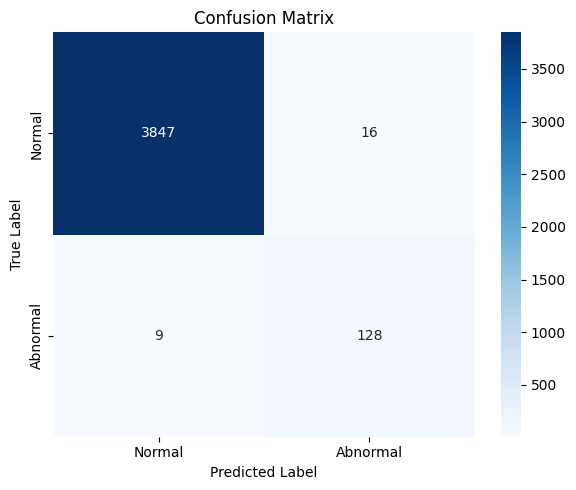

[3847   16    9  128]


In [482]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
class_names = ['Normal', 'Abnormal']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# y_test shape - 4000

print(metrics.confusion_matrix(y_test, y_pred).ravel())

In [491]:
cm

array([[3847,   16],
       [   9,  128]], dtype=int64)

In [393]:
# Get feature importances
fi = best_reg.feature_importances_
features = X_train.columns

# Sort and display
fi_df = pd.DataFrame({'feature': features, 'importance': fi})
fi_df = fi_df.sort_values('importance', ascending=False)

print(fi_df)

               feature  importance
8            Torque Nm    0.192536
9        Tool Wear min    0.168406
7   Rotation Speed rpm    0.166933
3    TorqueRollingMean    0.154917
0                Power    0.081549
1           TorqueMean    0.058207
5          Ambient T C    0.043437
2          ToolWearMax    0.035882
6          Process T C    0.029983
11        Model type T    0.024694
4              Quality    0.021113
10        Model type S    0.014851
12        Model type Z    0.007490


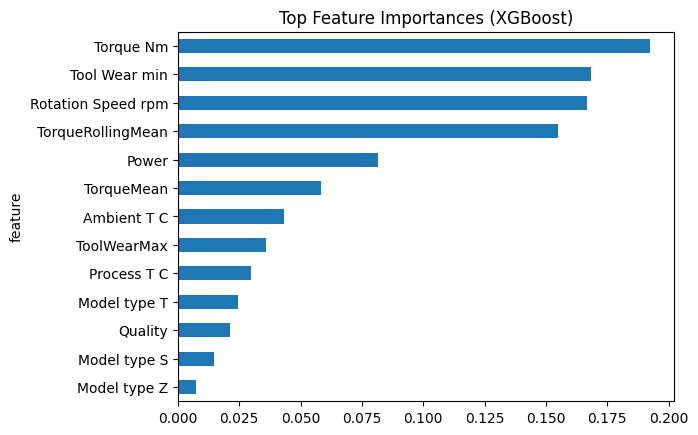

In [394]:
# Plot top features
fi_df.head(20).plot.barh(x='feature', y='importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (XGBoost)")
plt.show()

In [395]:
# Gain = Total gains of splits which use the feature. (Features with high gain are usually the most important features)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

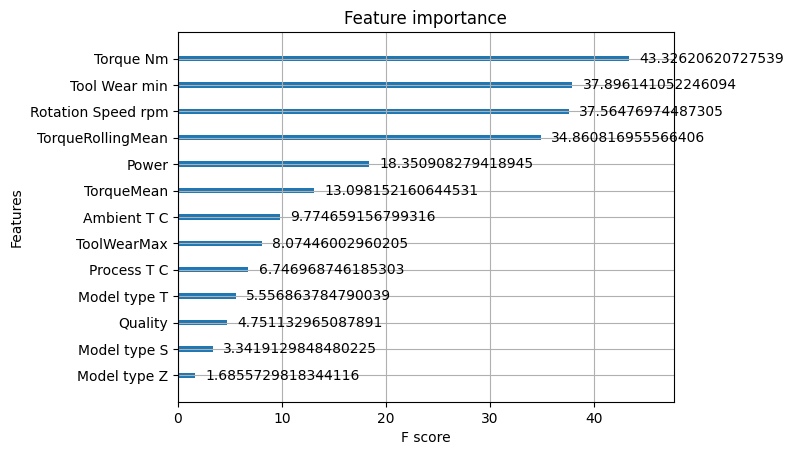

In [396]:
xgb.plot_importance(best_reg, importance_type="gain")

## shap
-  Y-axis indicates the feature names in order of importance from top to bottom.
-  
X-axis represents the SHAP value, which indicates the degree of change in log odds.
-  
The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low valus
- .
Each point represents a row of data from the original dataset.

In [398]:
import shap
explainer = shap.Explainer(best_reg)
shap_values = explainer.shap_values(X_test)

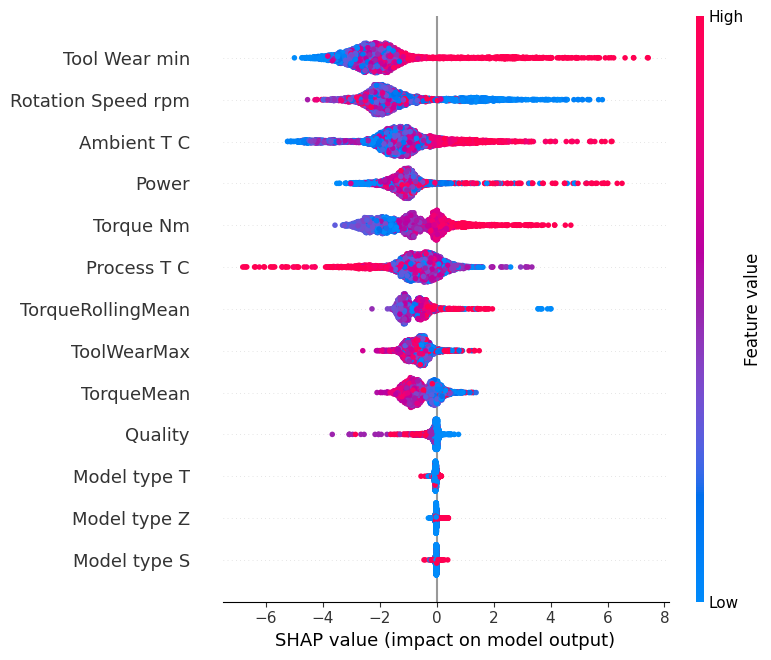

In [399]:
shap.summary_plot(shap_values, X_test, feature_names = FEATURES)

In [400]:
shap_imp = np.abs(shap_values).mean(axis=0)
shap_imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": shap_imp
}).sort_values("mean_abs_shap", ascending=False)

print(shap_imp_df.head())

              feature  mean_abs_shap
9       Tool Wear min       2.280280
7  Rotation Speed rpm       1.800908
5         Ambient T C       1.478818
0               Power       1.237042
8           Torque Nm       1.189792


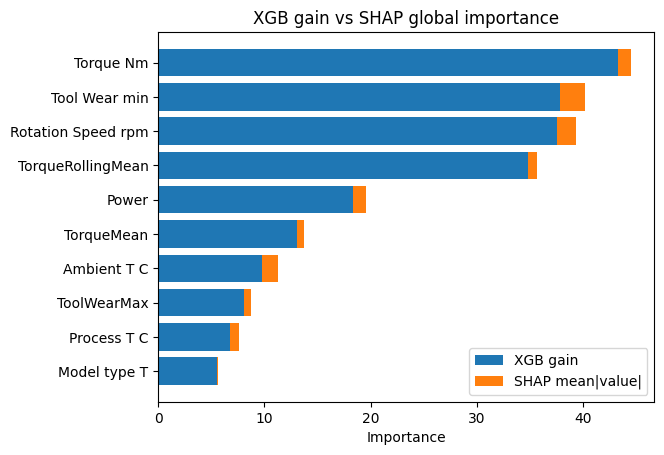

In [401]:
xgb_gain = best_reg.get_booster().get_score(importance_type="gain")
gain_df = pd.DataFrame({
    "feature": list(xgb_gain.keys()),
    "gain": list(xgb_gain.values())
}).sort_values("gain", ascending=False)

# align both lists
merged = gain_df.merge(shap_imp_df, on="feature").head(10)

plt.figure()
plt.barh(merged["feature"], merged["gain"], label="XGB gain")
plt.barh(merged["feature"], merged["mean_abs_shap"], 
         left=merged["gain"], label="SHAP mean|value|")
plt.legend()
plt.xlabel("Importance")
plt.title("XGB gain vs SHAP global importance")
plt.gca().invert_yaxis()
plt.show()

# XGBoost gain importance

The average reduction in training loss (e.g. squared error) every time a feature is used in a split.

Favors features that are used often in many splits—even if each split only nudges the prediction a little.

# SHAP global importance

The average absolute SHAP value across all samples—that is, how much each feature actually moves the model’s output on average.

Favors features that occasionally have large effects on individual predictions, even if they’re used less frequently.